<h1><center> Investment Assignement Analysis <br>


<h4><center> By <br><br>
Farooq Ahmed,MSc IBF(Liverpool JMU), MBA (City London), EPAT <br>
email <font color='Blue'>Farooqams@hotmail.com<font color='Blue'>

<h5><center>Aug 2021

#### Import Library

We import following libraries 

In [246]:
%%time
#import math 

import datetime ## download to convert data formating
import numpy as np 
import pandas as pd
pd.options.display.float_format = "{:,.2f}".format ## This libary parameter is downloaded keep the data in Notional Decimal.

import seaborn as sns ## download for using rich sea-born theme 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
sns.set_style('dark') 
# sns.color_palette("bright", 10)
sns.light_palette("green", as_cmap=True)
plt.rcParams['font.family'] = 'serif'
%matplotlib inline

import os
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')


Wall time: 22.9 ms


#### STEP : Data Clearning and Pre-processing (Data Cleaning 1)

Data is imported using Pandas library for CSV formats. In addtion, the data is applied with fillNA to identify blank fields as "0". We download the data using standardise encoding, in addtion parsing the datetime. We converted the dates in similar format and lowering the companies unique ID (columns) and this is also applied to  round2.csv file, where name is standardise for its formating.

In [247]:
companies = pd.read_csv('companies.csv',encoding = "ISO-8859-1",parse_dates=True).fillna(0) 
companies['founded_at'] = pd.to_datetime(companies['founded_at'], errors = 'coerce')
companies['permalink'] = companies['permalink'].str.lower()

In [248]:
companies.info() ## we check the number of rows count and data quality / type. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   permalink      66368 non-null  object        
 1   name           66368 non-null  object        
 2   homepage_url   66368 non-null  object        
 3   category_list  66368 non-null  object        
 4   status         66368 non-null  object        
 5   country_code   66368 non-null  object        
 6   state_code     66368 non-null  object        
 7   region         66368 non-null  object        
 8   city           66368 non-null  object        
 9   founded_at     66364 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(9)
memory usage: 5.1+ MB


We identify the unique companies present in companies dataframe. There are many function and techniques that IND be used, we use the pandas nunique function to calculate, the unique compaines.

In [249]:
companies['permalink'].nunique()

66368

The mapping.csv which contain pivot type of data of various segments will be downloaded using Pandas libary. 

In [250]:
mapping = pd.read_csv('mapping.csv',encoding = "ISO-8859-1")

In [251]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


We download the funding round file "rounds2.csv" which contain list of funding details / type of funding details. The data is further fix for dates columns, standardise the unique column to lower caps, which will be used for mapping later.

In [252]:
rounds2 = pd.read_csv("rounds2.csv",sep=",",encoding = "ISO-8859-1",parse_dates=True).fillna(0)
rounds2['funded_at'] = pd.to_datetime(rounds2['funded_at'], errors = 'coerce')
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2['raised_amount_usd'] = rounds2['raised_amount_usd'].apply(float)

In [253]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   company_permalink        114949 non-null  object        
 1   funding_round_permalink  114949 non-null  object        
 2   funding_round_type       114949 non-null  object        
 3   funding_round_code       114949 non-null  object        
 4   funded_at                114949 non-null  datetime64[ns]
 5   raised_amount_usd        114949 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.3+ MB


We identify unique companies present in rounds2 dataframe. Which are exactly the same.

In [254]:
rounds2['company_permalink'].nunique()

66370

In the companies data frame, we used "company_permalink" column IND as unique key. As this is avilable in both the datasets of compaines.csv and rounds2.csv, respectively.

<h2><ins> Are there any companies in the rounds2 file which are not present in companies?

When both the unique compaines and unquie round2 identifiers are joined, we noticed the unique length is still the same, meaning there is no change.
Hence the answer is NO. Below is the code which we applied using Pandas merge to measure if both the data sets a mutually same. The Data is merged using Pandas merge function. 

In [255]:
master_frame = pd.merge(rounds2,companies,how='inner',left_on='company_permalink',right_on='permalink')

In [256]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   company_permalink        114942 non-null  object        
 1   funding_round_permalink  114942 non-null  object        
 2   funding_round_type       114942 non-null  object        
 3   funding_round_code       114942 non-null  object        
 4   funded_at                114942 non-null  datetime64[ns]
 5   raised_amount_usd        114942 non-null  float64       
 6   permalink                114942 non-null  object        
 7   name                     114942 non-null  object        
 8   homepage_url             114942 non-null  object        
 9   category_list            114942 non-null  object        
 10  status                   114942 non-null  object        
 11  country_code             114942 non-null  object        
 12  state_code      

In [257]:
master_frame.describe()

,raised_amount_usd
count,"114,942.00"
mean,"8,614,113.72"
std,"104,438,747.81"
min,0.00
25%,"50,000.00"
50%,"1,000,000.00"
75%,"5,000,000.00"
max,"21,271,935,000.00"


We will use pandas nunique function to find the unique companies in the metioned column in order to find and confirm the total unique companies are same as below. 

In [258]:
master_frame['company_permalink'].nunique()

66363

After merging we will drop the permalink column which is a duplicated column

In [259]:
master_frame = master_frame.drop('permalink', axis=1) # given there are two similar columns

In [260]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   company_permalink        114942 non-null  object        
 1   funding_round_permalink  114942 non-null  object        
 2   funding_round_type       114942 non-null  object        
 3   funding_round_code       114942 non-null  object        
 4   funded_at                114942 non-null  datetime64[ns]
 5   raised_amount_usd        114942 non-null  float64       
 6   name                     114942 non-null  object        
 7   homepage_url             114942 non-null  object        
 8   category_list            114942 non-null  object        
 9   status                   114942 non-null  object        
 10  country_code             114942 non-null  object        
 11  state_code               114942 non-null  object        
 12  region          

## Checkpoint 2: Funding Type Analysis

We measure the various types of "Funding Type" is offered by the companies. We will use pandas unique tool to find the unique funds.  

In [261]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

from the unique funding type we select top 4 which are seed, angel, venture and PE

In [262]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [263]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94390 entries, 0 to 114940
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   company_permalink        94390 non-null  object        
 1   funding_round_permalink  94390 non-null  object        
 2   funding_round_type       94390 non-null  object        
 3   funding_round_code       94390 non-null  object        
 4   funded_at                94390 non-null  datetime64[ns]
 5   raised_amount_usd        94390 non-null  float64       
 6   name                     94390 non-null  object        
 7   homepage_url             94390 non-null  object        
 8   category_list            94390 non-null  object        
 9   status                   94390 non-null  object        
 10  country_code             94390 non-null  object        
 11  state_code               94390 non-null  object        
 12  region                   94390 

Now we will aggregate the data by pandas groupby function.  

In [264]:
master_by_fundtype = master_frame.groupby('funding_round_type')

In [326]:
analysis_0 = pd.DataFrame(master_by_fundtype['raised_amount_usd'].median().sort_values(ascending = False))
analysis_0= analysis_0['raised_amount_usd'].head()
analysis_0

funding_round_type
private_equity   12,122,011.00
venture           4,000,000.00
angel               250,000.00
seed                120,000.00
Name: raised_amount_usd, dtype: float64

We will convert the fundtype in pd.DataFrame for graphic visualization. Further, aggregating funds by average value 

In [327]:
analysis1 = pd.DataFrame(master_by_fundtype['raised_amount_usd'].sum().sort_values(ascending = False))
analysis1= analysis1['raised_amount_usd'].head()
analysis1

funding_round_type
venture          590,126,216,876.00
private_equity   141,925,436,105.00
seed              16,988,238,596.00
angel              4,659,255,123.00
Name: raised_amount_usd, dtype: float64

([<matplotlib.patches.Wedge at 0x1fc2a171040>,
 [Text(-0.8540767368911271, 0.6932192492288458, 'private_equity   '),
  Text(0.7881366640499333, -0.7673594977455109, 'venture'),
  Text(1.0933935814902505, -0.12037639285143649, 'angel               '),
  Text(1.0997925618944762, -0.021361666638750346, 'seed                ')],
 [Text(-0.46586003830425105, 0.3781195904884613, '78.2973%'),
  Text(0.4298927258454181, -0.4185597260430059, '18.8305%'),
  Text(0.596396498994682, -0.06565985064623808, '2.2540%'),
  Text(0.5998868519424414, -0.011651818166591096, '0.6182%')])

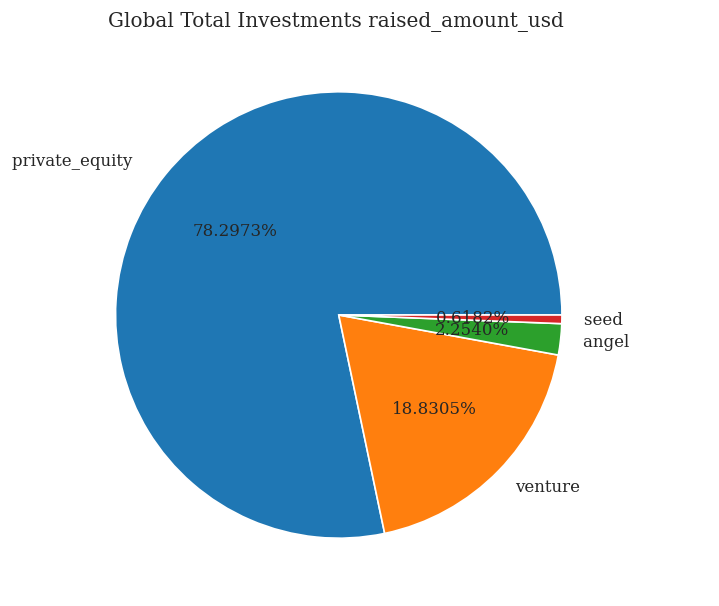

In [266]:
plt.figure(figsize=[6,7],dpi=120,edgecolor='c',frameon=True)
plt.title('Global Total Investments raised_amount_usd ')
labels = 'private_equity   ', 'venture', 'angel               ', 'seed                '
plt.pie(analysis1, labels=labels,autopct='%1.4f%%', startangle=0)

In [267]:
analysis11 = pd.DataFrame(master_by_fundtype['raised_amount_usd'].mean().sort_values(ascending = False))
analysis11

,raised_amount_usd
funding_round_type,
private_equity,"62,111,788.23"
venture,"10,634,246.06"
angel,"764,564.35"
seed,"556,662.91"


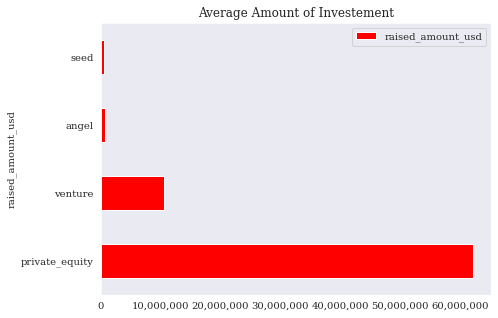

<Figure size 432x288 with 0 Axes>

In [268]:
analysis11.plot.barh(figsize=(7,5), color=['red'])
ax = plt.gca()

ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("raised_amount_usd")
plt.title("Average Amount of Investement") 
plt.show()

plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')

We use the seaborn library for analysis

We noticed, from the above illustration its is evident that the larges funds are in PE and Venture.

## Checkpoint 3: Country Analysis

#### For Country analysis we use the master_frame to groupby "Country Code", and then aggregrating in decending order. 
#### For our requirement we are interested in TOP 10 Countries. 

In [269]:
analysis3 = pd.DataFrame(master_frame.groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending = False)).head(10).drop(0)
analysis3

,raised_amount_usd
country_code,
USA,"511,268,539,172.00"
CHN,"61,497,415,923.00"
GBR,"27,167,554,378.00"
IND,"21,331,618,815.00"
CAN,"13,271,109,812.00"
DEU,"8,627,354,828.00"
ISR,"8,156,387,371.00"
FRA,"8,114,599,925.00"
NLD,"5,094,011,584.00"


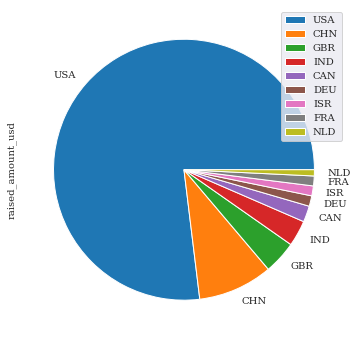

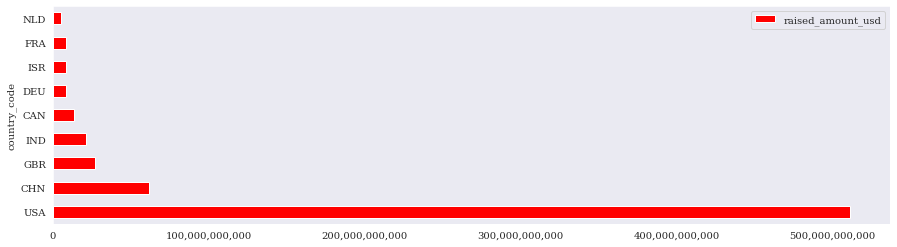

<Figure size 432x288 with 0 Axes>

In [270]:
analysis3.plot.pie(y ='raised_amount_usd', figsize=(10,6))
analysis3.plot.barh(figsize=(15,4), color=['red'])
ax = plt.gca()

ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')

#### in order to classify the English speaking countries, we use following Wikipedia page.  We specifically use following condition "Countries where English is a de jure and a de facto official language". Hence, from the analysis USA, GBR and IND is selected. 


https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language

#### from the list we found there is only USA, GBR (UK) and INR (India) is english speaking country. We filter the data by using the three countries.

In [271]:
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]

In [272]:
analysis4 = pd.DataFrame(master_frame.groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending = False))
analysis4

,raised_amount_usd
country_code,
USA,"511,268,539,172.00"
GBR,"27,167,554,378.00"
IND,"21,331,618,815.00"


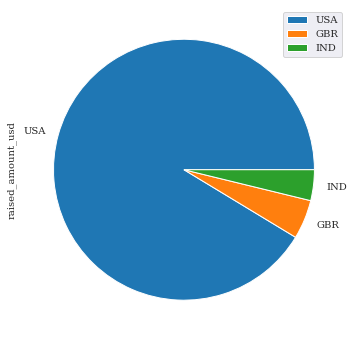

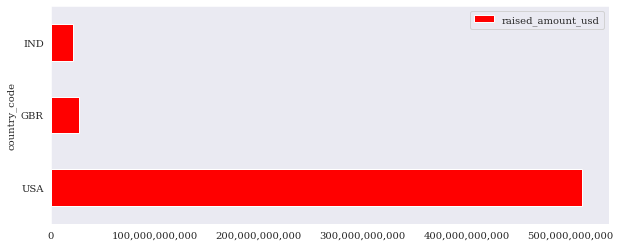

<Figure size 432x288 with 0 Axes>

In [273]:
analysis4.plot.pie(y ='raised_amount_usd', figsize=(10,6))
analysis4.plot.barh(figsize=(10,4), color=['red'])
ax = plt.gca()

ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')

## Checkpoint 4: Sector Analysis 1

#### The expectation of the sector analysis is to identify the correct sector from the list of eight columns. In order to create the analysis we would be first cleaning.

Pandas.pydata.org. 2021. pandas.DataFrame.replace — pandas 1.3.1 documentation. [online] Available at: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html> [Accessed 13 August 2021].

In [274]:
master_frame.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,1970-01-01
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,0.00,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,2014-04-09


We will split the main sector in our companies list, in order to map. We will use the first identified sector for mapping, to keep things simiple. 

In [275]:
master_frame.loc[:,'main_sector'] = master_frame['category_list'].str.split('|').str[0].copy()
master_frame.loc[:,'main_sector'] = master_frame['main_sector'].str.lower().copy()
master_frame.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,1970-01-01,media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,2014-10-14,0.00,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,2014-04-09,application platforms


The earlier downloaded mapping.csv , we check and the data is provided in a pivot wide form, hence to convert in long-form (vertical), we would be clean and then use melt function covert the wide form to long form data, which will be suitible in mapping between mapping.csv and companies data.

In [276]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


We first use  the 'melt' function we transpose the column names (wide form data) into master_category column with values 0 and 1.Further, we Remove rows with 0s in value column and Blanks in main_sector column. Lastly, we then drop value column as its of no use.

In [277]:
mapping = mapping.melt(id_vars="category_list",var_name="primary_sector")

In [278]:
mapping.head(10)

,category_list,primary_sector,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
5,Active Lifestyle,Automotive & Sports,0
6,Ad Targeting,Automotive & Sports,0
7,Advanced Materials,Automotive & Sports,0
8,Adventure Travel,Automotive & Sports,1
9,Advertising,Automotive & Sports,0


In [279]:
mapping = mapping.loc[~(mapping["value"]==0)]

In [280]:
mapping.head(10)

,category_list,primary_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [281]:
mapping = mapping.loc[~(mapping['primary_sector']=='Blanks')]

In [282]:
mapping.head(10)

,category_list,primary_sector,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [283]:
mapping['category_list'] = mapping['category_list'].str.lower()

In [284]:
mapping.head(10)

,category_list,primary_sector,value
8,adventure travel,Automotive & Sports,1
14,aerospace,Automotive & Sports,1
45,auto,Automotive & Sports,1
46,automated kiosk,Automotive & Sports,1
47,automotive,Automotive & Sports,1
57,bicycles,Automotive & Sports,1
69,boating industry,Automotive & Sports,1
87,cad,Automotive & Sports,1
93,cars,Automotive & Sports,1
188,design,Automotive & Sports,1


In [285]:
mapping.drop(columns="value")

,category_list,primary_sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports
...,...,...
6121,social recruiting,"Social, Finance, Analytics, Advertising"
6122,social television,"Social, Finance, Analytics, Advertising"
6123,social travel,"Social, Finance, Analytics, Advertising"
6134,stock exchanges,"Social, Finance, Analytics, Advertising"


after cleaning the data we merge it with master_frame.

In [286]:
master_frame_sector_analysis = pd.merge(master_frame,mapping,how='inner',left_on='main_sector',right_on='category_list')

we drop the duplicated columns

In [287]:
master_frame_sector_analysis.drop(columns=["category_list_y","value"],inplace=True)

In [288]:
master_frame_sector_analysis.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,main_sector,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,2015-05-01,"10,000,000.00",#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,1970-01-01,media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,0,2015-06-10,"15,000,000.00",90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,2011-01-01,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,0,2013-07-05,"5,800,000.00",90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,2011-01-01,media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,0,2014-03-26,"18,000,000.00",90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,2011-01-01,media,Entertainment
4,/organization/all-day-media,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,0,2014-12-16,"2,000,000.00",ALL DAY MEDIA,http://allday.com/,Media|Social Media,operating,USA,CA,Los Angeles,Los Angeles,2013-01-01,media,Entertainment
5,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,2014-06-08,"5,000,000.00",All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,1970-01-01,media,Entertainment
6,/organization/audiosocket,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,0,2013-02-05,"650,000.00",Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,2008-01-05,media,Entertainment
7,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,A,2009-02-09,"750,000.00",Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,2008-01-05,media,Entertainment
8,/organization/audiosocket,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,0,2012-02-15,"1,582,300.00",Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,2008-01-05,media,Entertainment
9,/organization/audiosocket,/funding-round/c4c4fdbe04a6a1a02b8453b91628c015,seed,0,2008-01-01,"500,000.00",Audiosocket,http://audiosocket.com,Media|Music|Technology,operating,USA,WA,Seattle,Seattle,2008-01-05,media,Entertainment


we observed marginal variance between medium and mode, we decided to use mean.

In [289]:
master_frame_sector_analysis.describe()

,raised_amount_usd
count,"59,218.00"
mean,"8,770,696.37"
std,"81,884,366.55"
min,0.00
25%,"250,000.00"
50%,"1,800,000.00"
75%,"7,600,000.00"
max,"17,600,000,000.00"


In [290]:
analysis5 = pd.DataFrame(master_frame_sector_analysis.groupby(by='main_sector')['raised_amount_usd'].sum().sort_values(ascending = False)).head(10)
analysis5

,raised_amount_usd
main_sector,
biotechnology,"79,619,859,505.00"
software,"28,608,316,535.00"
clean technology,"27,779,748,145.00"
semiconductors,"27,095,359,477.00"
advertising,"25,007,604,113.00"
e-commerce,"20,858,011,162.00"
health care,"20,362,626,463.00"
enterprise software,"17,792,693,664.00"
mobile,"15,331,437,127.00"


We created using matplotlib average size of the sectors. 

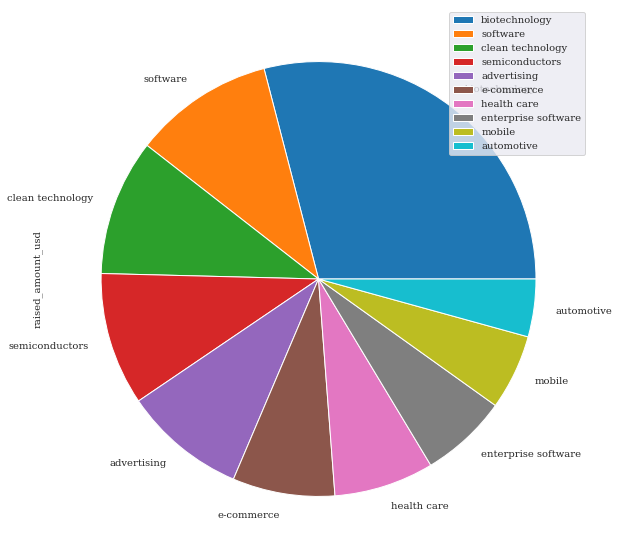

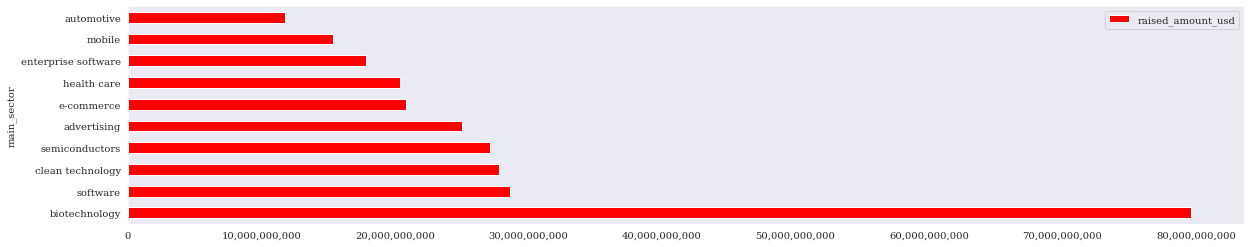

<Figure size 432x288 with 0 Axes>

In [291]:
analysis5.plot.pie(y ='raised_amount_usd', figsize=(10,10))
analysis5.plot.barh(figsize=(20,4), color=['red'])
ax = plt.gca()

ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')

### Sector Analysis 2

We further drilled down out sector analysis by top countries. We selected USA, UK and India, based on english as one of the offical langauge 

In [292]:
D1 =master_frame_sector_analysis.loc[master_frame_sector_analysis['country_code']=='USA']
D2 =master_frame_sector_analysis.loc[master_frame_sector_analysis['country_code']=='GBR']
D3=master_frame_sector_analysis.loc[master_frame_sector_analysis['country_code']=='IND']

<h2><ins> total number of investments and the total amount of investments in each main sector

In [293]:
Total_number_USD_sector_by_Count=pd.DataFrame(D1.groupby(by='main_sector')['main_sector'].count().
                     rename('Total_number_USD_sector').sort_values(ascending = False))
Total_number_USD_sector_by_Count.head(3)

,Total_number_USD_sector
main_sector,
biotechnology,6402
software,4048
advertising,2769


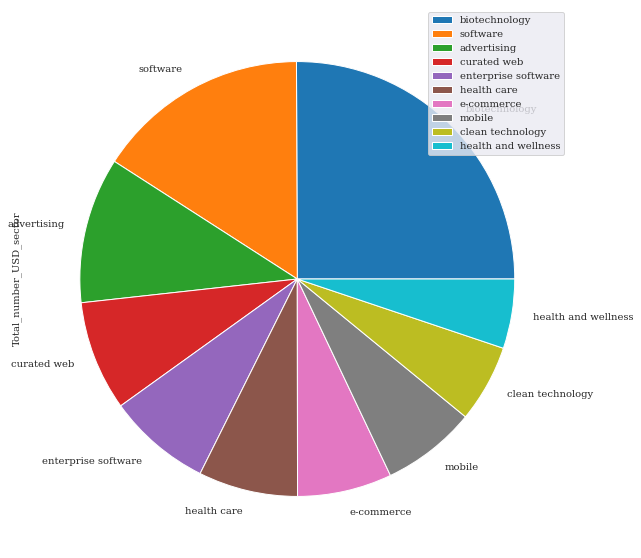

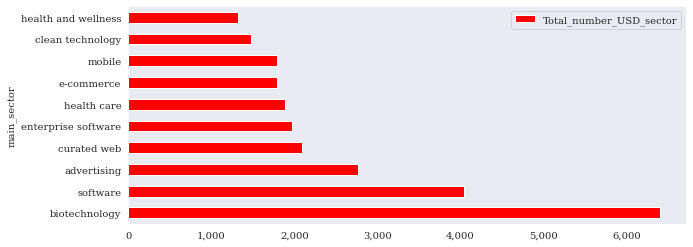

<Figure size 432x288 with 0 Axes>

In [328]:
Total_number_USD_sector_by_Count.head(10).plot.pie(y ='Total_number_USD_sector', figsize=(10,10))
Total_number_USD_sector_by_Count.head(10).plot.barh(figsize=(10,4), color=['red'])
ax = plt.gca()

ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')

In [295]:
Total_number_GBP_sector_by_Count=pd.DataFrame(D2.groupby(by='main_sector')['main_sector'].count().
                     rename('Total_number_GBP_sector').sort_values(ascending = False))
Total_number_GBP_sector_by_Count.head(3)

,Total_number_GBP_sector
main_sector,
biotechnology,343
software,305
e-commerce,246


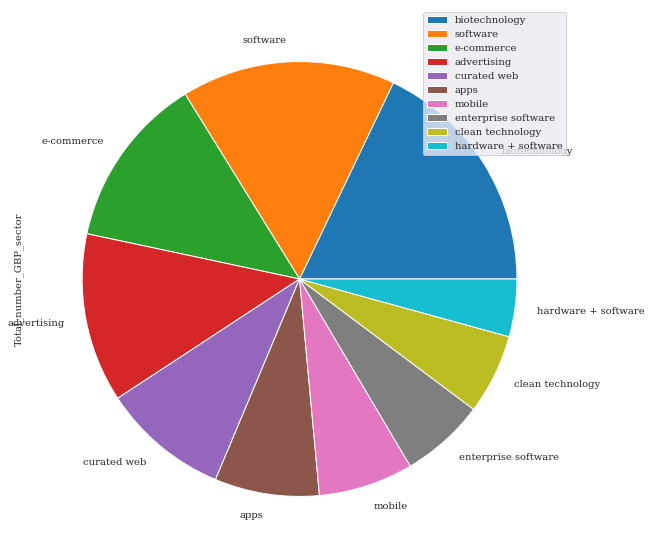

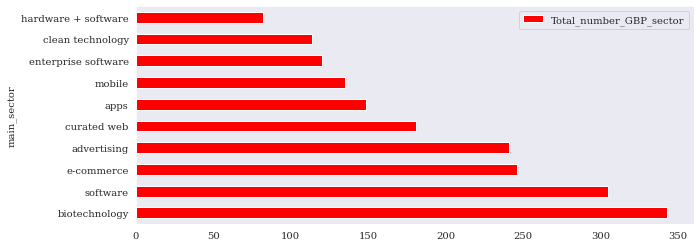

<Figure size 432x288 with 0 Axes>

In [330]:
Total_number_GBP_sector_by_Count.head(10).plot.pie(y ='Total_number_GBP_sector', figsize=(10,10))
Total_number_GBP_sector_by_Count.head(10).plot.barh(figsize=(10,4), color=['red'])
ax = plt.gca()

ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')

In [297]:
Total_number_IND_sector_by_Count=pd.DataFrame(D3.groupby(by='main_sector')['main_sector'].count().
                     rename('Total_number_IND_sector').sort_values(ascending = False))
Total_number_IND_sector_by_Count.head(3)

,Total_number_IND_sector
main_sector,
e-commerce,239
education,89
software,89


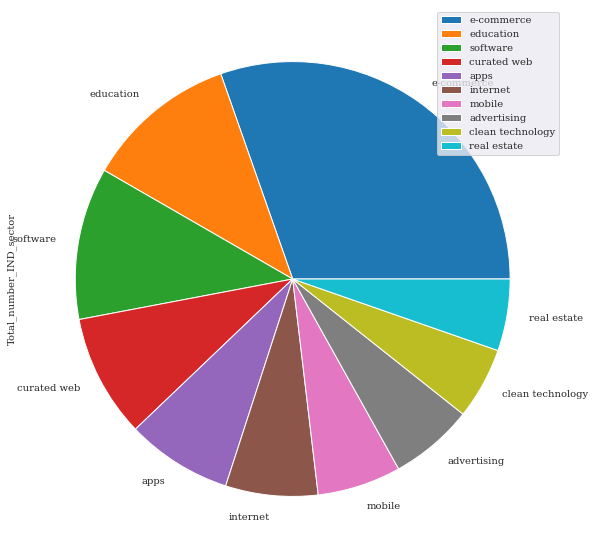

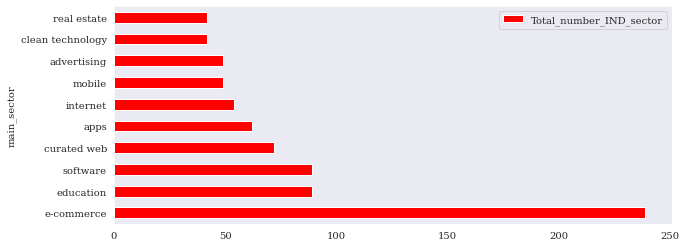

<Figure size 432x288 with 0 Axes>

In [331]:
Total_number_IND_sector_by_Count.head(10).plot.pie(y ='Total_number_IND_sector', figsize=(10,10))
Total_number_IND_sector_by_Count.head(10).plot.barh(figsize=(10,4), color=['red'])
ax = plt.gca()

ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')

<h2><ins>  2. Total amount of investment (USD)

In [334]:
Total_number_USD_sector=pd.DataFrame(D1.groupby(by='main_sector')['raised_amount_usd'].sum().
                     rename('Total_Investment_Amount').sort_values(ascending = False))
Total_number_USD_sector.head(3)

,Total_Investment_Amount
main_sector,
biotechnology,"75,062,271,803.00"
semiconductors,"26,753,995,635.00"
software,"26,736,165,843.00"


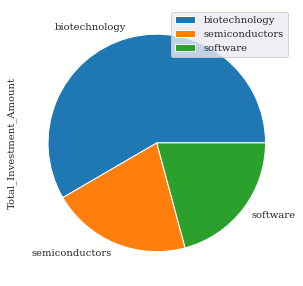

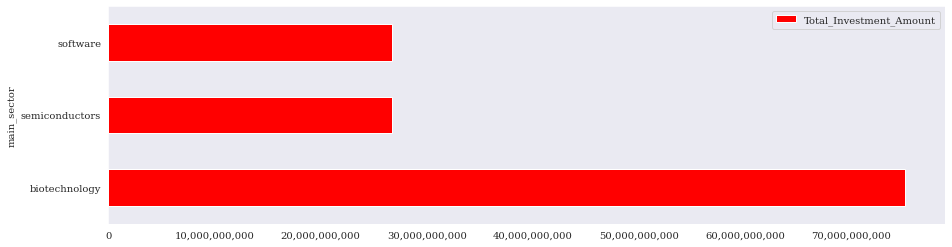

<Figure size 432x288 with 0 Axes>

In [339]:
Total_number_USD_sector.head(3).plot.pie(y ='Total_Investment_Amount', figsize=(5,5))
Total_number_USD_sector.head(3).plot.barh(figsize=(15,4), color=['red'])
ax = plt.gca()

ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')

In [340]:
Total_number_GBP_sector=pd.DataFrame(D2.groupby(by='main_sector')['raised_amount_usd'].sum().
                     rename('Total_Investment_Amount').sort_values(ascending = False))
Total_number_GBP_sector.head(3)

,Total_Investment_Amount
main_sector,
biotechnology,"4,065,872,702.00"
mobile,"1,381,801,830.00"
software,"1,263,803,998.00"


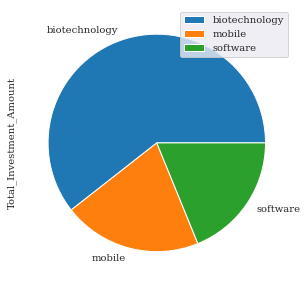

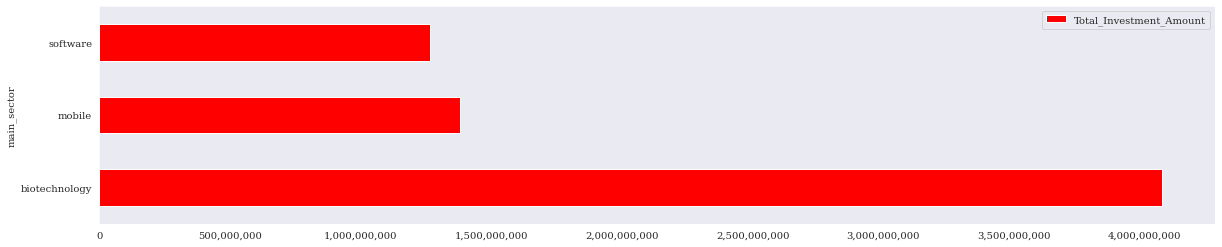

<Figure size 432x288 with 0 Axes>

In [341]:
Total_number_GBP_sector.head(3).plot.pie(y ='Total_Investment_Amount', figsize=(5,5))
Total_number_GBP_sector.head(3).plot.barh(figsize=(20,4), color=['red'])
ax = plt.gca()

ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')

In [342]:
Total_number_IND_sector=pd.DataFrame(D3.groupby(by='main_sector')['raised_amount_usd'].sum().
                     rename('Total_Investment_Amount').sort_values(ascending = False))
Total_number_IND_sector.head(3)

,Total_Investment_Amount
main_sector,
e-commerce,"6,850,695,336.00"
automotive,"1,479,541,187.00"
clean technology,"1,343,857,000.00"


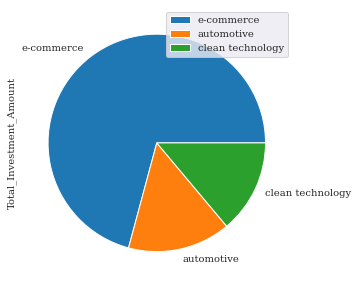

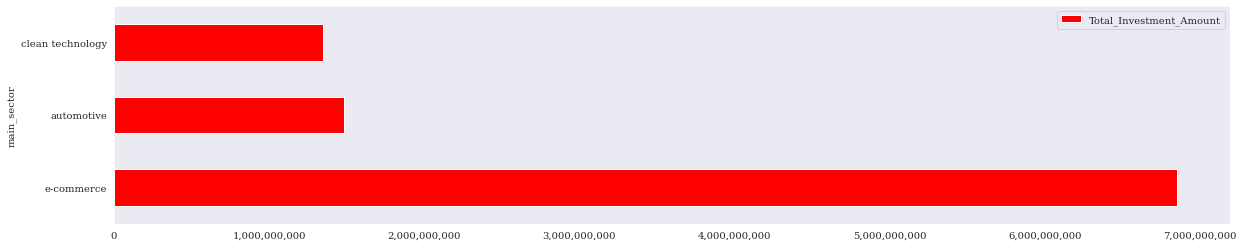

<Figure size 432x288 with 0 Axes>

In [343]:
Total_number_IND_sector.head(3).plot.pie(y ='Total_Investment_Amount', figsize=(5,5))
Total_number_IND_sector.head(3).plot.barh(figsize=(20,4), color=['red'])
ax = plt.gca()

ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

import matplotlib.ticker as mtick
fmt = '$%.0f'
tick = mtick.FormatStrFormatter(fmt)
ax.get_xaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
plt.savefig(os.path.join('test.png'), dpi=300, format='png', bbox_inches='tight')

In [305]:
D1=pd.merge(pd.merge(D1,Total_number_USD_sector,how='inner',left_on='main_sector',right_index=True),
                    Total_number_USD_sector,how='inner',left_on='main_sector',right_index=True)
D1.shape

(53084, 19)

In [306]:
D2=pd.merge(pd.merge(D2,Total_number_GBP_sector,how='inner',left_on='main_sector',right_index=True),
                    Total_number_GBP_sector,how='inner',left_on='main_sector',right_index=True)
D2.shape

(4282, 19)

In [307]:
D3=pd.merge(pd.merge(D3,Total_number_IND_sector,how='inner',left_on='main_sector',right_index=True),
                    Total_number_IND_sector,how='inner',left_on='main_sector',right_index=True)
D3.shape

(1852, 19)

<h2><ins>  3. Top sector (based on count of investments)

Table 5.1: For point 3 (TOP sector count-wise), finding comapies received highest investment in term of count [Not amount]

In [308]:
D1.loc[D1['main_sector']=='biotechnology'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False).head()


company_permalink
/organization/pro-pharmaceuticals           12
/organization/aviir                         12
/organization/covenant-surgical-partners    12
/organization/airxpanders                   11
/organization/exagen-diagnostics            11
Name: raised_amount_usd, dtype: int64

In [309]:
D2.loc[D2['main_sector']=='biotechnology'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False).head()

company_permalink
/organization/desktop-genetics                                                 6
/organization/f-star-biotechnologische-forschungs-und-entwicklungsges-m-b-h    6
/organization/population-genetics-technologies                                 6
/organization/green-biologics                                                  6
/organization/oxford-biotherapeutics                                           5
Name: raised_amount_usd, dtype: int64

In [310]:
D3.loc[D3['main_sector']=='clean technology'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False).head()

company_permalink
/organization/azure-power                     6
/organization/attero-recycling                4
/organization/villgro-innovation-marketing    3
/organization/sunborne-energy                 3
/organization/renew-power                     3
Name: raised_amount_usd, dtype: int64

Table 5.1: For point 4 (second best sector count-wise), finding comapies received highest investment in term of count [Not amount]¶


<h2><ins>  4. Second-best sector (based on count of investments)

In [311]:
D1.loc[D1['main_sector']=='semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False).head()


company_permalink
/organization/quellan                         16
/organization/alien-technology                10
/organization/advanced-inquiry-systems-inc     9
/organization/quantenna                        9
/organization/clariphy-communications          8
Name: raised_amount_usd, dtype: int64

In [312]:
D2.loc[D2['main_sector']=='finance'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False).head()

Series([], Name: raised_amount_usd, dtype: int64)

In [313]:
D3.loc[D3['main_sector']=='biotechnology'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False).head()

company_permalink
/organization/perfint-healthcare      4
/organization/vyome-biosciences       3
/organization/trivitron-healthcare    3
/organization/ziqitza-health-care     2
/organization/celon-laboratories      1
Name: raised_amount_usd, dtype: int64

<h2><ins>  5. Third-best sector (based on count of investments)

In [314]:
D1.loc[D1['main_sector']=='software'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False).head()


company_permalink
/organization/terascala        13
/organization/lecere           11
/organization/bti-systems      10
/organization/activenetwork     9
/organization/transactis        9
Name: raised_amount_usd, dtype: int64

In [315]:
D2.loc[D2['main_sector']=='mobile'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False).head()

company_permalink
/organization/icera         6
/organization/ubiquisys     6
/organization/dropletpay    5
/organization/fanatix       4
/organization/six3          4
Name: raised_amount_usd, dtype: int64

In [316]:
D3.loc[D3['main_sector']=='software'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending = False).head()

company_permalink
/organization/canvera-digital-technologies    5
/organization/99tests                         3
/organization/zoojoo-be                       2
/organization/uniphore                        2
/organization/newgen-software-technologies    2
Name: raised_amount_usd, dtype: int64

## Checkpoint 6: Plots


Reference to cell in earler. They are posted above.

## Reference 
Article title:	pandas.read_csv — pandas 1.3.1 documentation
Website title:	Pandas.pydata.org
URL:	https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Article title:	pandas.DataFrame.fillna — pandas 1.3.1 documentation
Website title:	Pandas.pydata.org
URL:	https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

Pandas.pydata.org. 2021. pandas.merge — pandas 1.3.1 documentation. [online] Available at: <https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html> [Accessed 9 August 2021].

Docs.python.org. 2021. 7. Input and Output — Python 3.9.6 documentation. [online] Available at: <https://docs.python.org/3/tutorial/inputoutput.html> [Accessed 11 August 2021].

Moffitt, C., 2021. Stylin’ with Pandas - Practical Business Python. [online] Pbpython.com. Available at: <https://pbpython.com/styling-pandas.html> [Accessed 11 August 2021].

Pandas.pydata.org. 2021. pandas.DataFrame.plot.bar — pandas 1.3.1 documentation. [online] Available at: <https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html> [Accessed 11 August 2021].

Pandas.pydata.org. 2021. pandas.melt — pandas 1.3.1 documentation. [online] Available at: <https://pandas.pydata.org/docs/reference/api/pandas.melt.html> [Accessed 13 August 2021].